### 1. Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [3]:
df=pd.read_csv("linear.csv.csv")

#### Let's explore the top 5 rows of the df


In [4]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
df.shape

(4345, 9)

In [6]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [7]:
df.rename(columns={"Engine Type":"Engine_Type"},inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [8]:
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [9]:
# CODE HERE
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [10]:
# CODE HERE
df=df.dropna(axis=0)
df

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 6. Let's check the descriptives without the missing values


In [11]:
# CODE HERE
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

### Price 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

<Figure size 1800x1200 with 0 Axes>

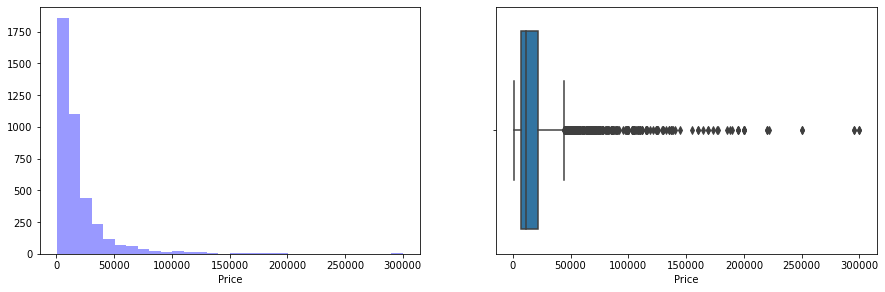

In [12]:
# CODE HERE
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['Price'], kde = False, color ='blue', bins = 30)

plt.subplot(2,2,2)
sns.boxplot(x='Price',data=df)


### Observations 

Price data is right skewed 
it has outliers above 50,000 

### Mileage 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage'>

<Figure size 1800x1200 with 0 Axes>

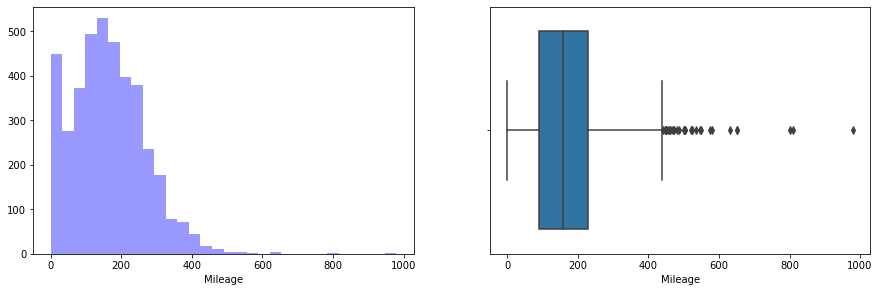

In [13]:
# CODE HERE
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['Mileage'], kde = False, color ='blue', bins = 30)

plt.subplot(2,2,2)
sns.boxplot(x='Mileage',data=df)

### Observations 

Right skewed 
Outliers above 400

### Engine V

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV'>

<Figure size 1800x1200 with 0 Axes>

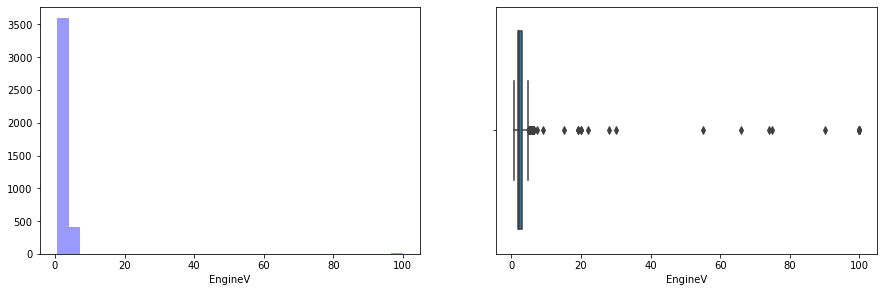

In [14]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['EngineV'], kde = False, color ='blue', bins = 30)

plt.subplot(2,2,2)
sns.boxplot(x='EngineV',data=df)

### Observations

Outliers are present

### Year

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year'>

<Figure size 1800x1200 with 0 Axes>

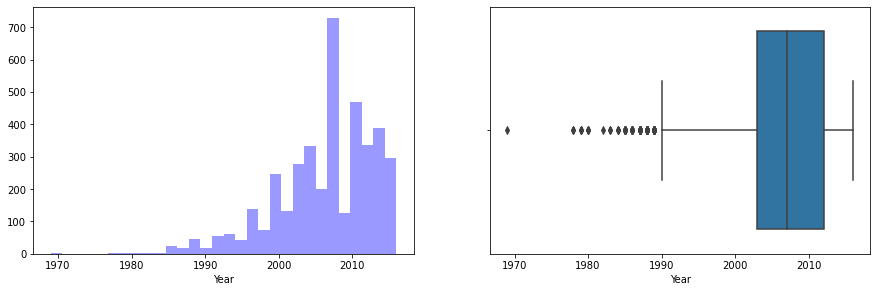

In [15]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['Year'], kde = False, color ='blue', bins = 30)

plt.subplot(2,2,2)
sns.boxplot(x='Year',data=df)

### Observaations

The data is left skewed 
most of the cars are of the year between 2000 & 2010
Outliers are present below 1990

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

The price column is right skewed for skewed data we use IQR to detect outliers 

#### 8B. Remove the Outliers which are presented in `Price` Column

In [16]:
# Finding Iqr
percentile25 = df['Price'].quantile(0.25)
percentile75 = df['Price'].quantile(0.75)
iqr= percentile75-percentile25 
iqr

14901.0

In [17]:
# finding lower and upper limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [3]:
# caping the outliers 
new_df=df.copy()
   df['Price'] = np.where(
    df['Price'] > upper_limit,
    upper_limit,
    np.where(
       df['Price'] < lower_limit,
        lower_limit,
         df['Price']
    )
)

IndentationError: unexpected indent (<ipython-input-3-f1f13d7181c3>, line 3)

In [19]:
new_df.shape

(4025, 9)

#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


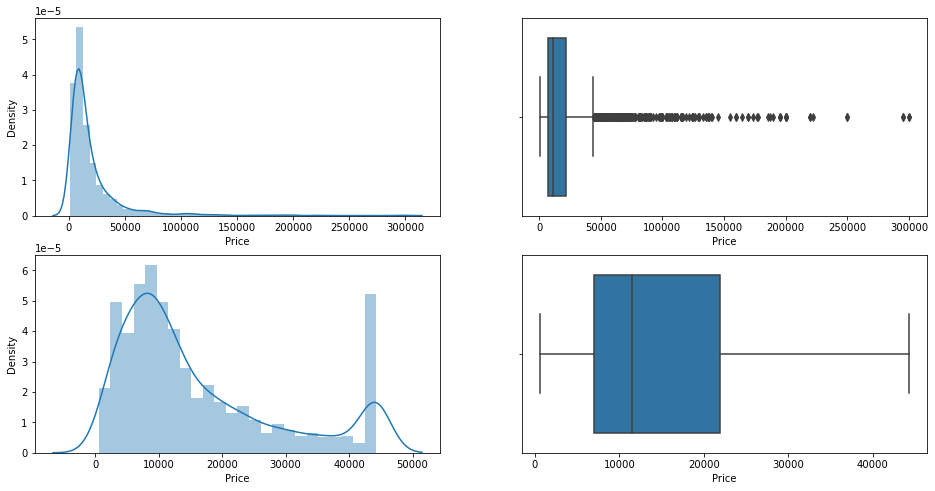

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Price'])
plt.subplot(2,2,2)
sns.boxplot(df['Price'])
plt.subplot(2,2,3)
sns.distplot(new_df['Price'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Price'])
plt.show()

Outliers are removed but still right skewed data 

#### 9A. Same identify and remove the outliers in `Milage` column

In [21]:
# Finding Iqr
percentile25 = new_df['Mileage'].quantile(0.25)
percentile75 = new_df['Mileage'].quantile(0.75)
iqr= percentile75-percentile25 
iqr

140.0

In [22]:
# finding lower and upper limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [23]:
# caping the outliers 
new_df['Mileage'] = np.where(
    new_df['Mileage'] > upper_limit,
    upper_limit,
    np.where(
        new_df['Mileage'] < lower_limit,
        lower_limit,
        new_df['Mileage']
    )
)

In [24]:
new_df.shape

(4025, 9)

#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


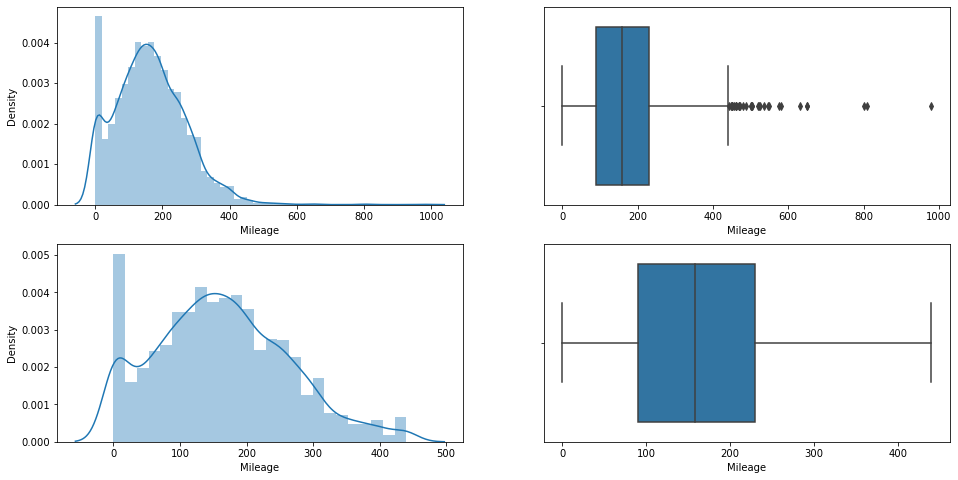

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Mileage'])
plt.subplot(2,2,2)
sns.boxplot(df['Mileage'])
plt.subplot(2,2,3)
sns.distplot(new_df['Mileage'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Mileage'])
plt.show()

outliers are removed and its almost normally ditributed 


#### 10A. Identify and remove the outliers from `EngineV` column



In [26]:
# Finding Iqr
percentile25 = new_df['EngineV'].quantile(0.25)
percentile75 = new_df['EngineV'].quantile(0.75)
iqr= percentile75-percentile25 
iqr

1.2

In [27]:
# finding lower and upper limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [28]:
# caping the outliers 
new_df['EngineV'] = np.where(
    new_df['EngineV'] > upper_limit,
    upper_limit,
    np.where(
        new_df['EngineV'] < lower_limit,
        lower_limit,
        new_df['EngineV']
    )
)

#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


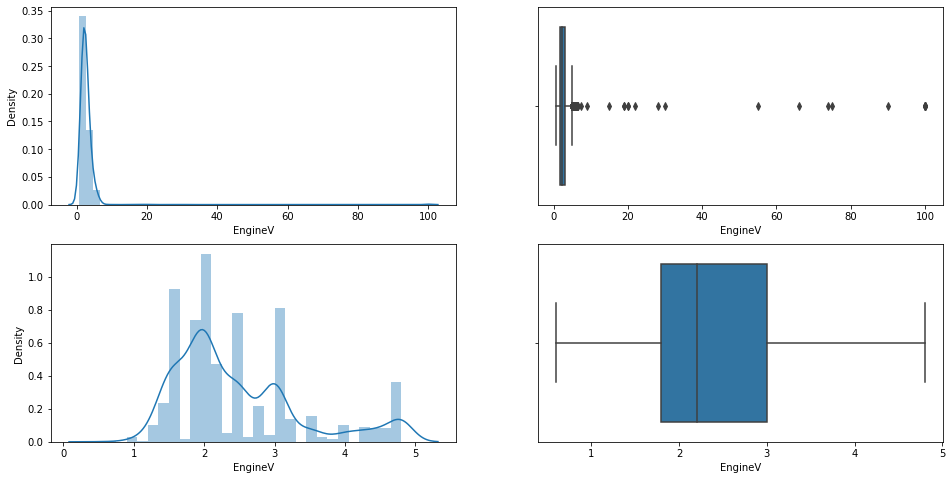

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['EngineV'])
plt.subplot(2,2,2)
sns.boxplot(df['EngineV'])
plt.subplot(2,2,3)
sns.distplot(new_df['EngineV'])
plt.subplot(2,2,4)
sns.boxplot(new_df['EngineV'])
plt.show()

outliers are removed still its right skewed 

In [30]:
new_df.shape

(4025, 9)

In [31]:
new_df.drop(["Model","Body"],axis=1,inplace=True)


In [32]:
new_df

,Brand,Price,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,4200.0,277.0,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,427.0,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,358.0,4.8,Gas,yes,2003
3,Audi,23000.0,240.0,4.2,Petrol,yes,2007
4,Toyota,18300.0,120.0,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...
4339,Toyota,17900.0,35.0,1.6,Petrol,yes,2014
4340,Mercedes-Benz,44251.5,9.0,3.0,Diesel,yes,2014
4341,BMW,6500.0,1.0,3.5,Petrol,yes,1999
4342,BMW,8000.0,194.0,2.0,Petrol,yes,1985


#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [33]:
new_df=pd.get_dummies(new_df)
new_df.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes
0,4200.0,277.0,2.0,1991,0,1,0,0,0,0,0,0,0,0,1,0,1
1,7900.0,427.0,2.9,1999,0,0,1,0,0,0,0,1,0,0,0,0,1
2,13300.0,358.0,4.8,2003,0,0,1,0,0,0,0,0,1,0,0,0,1
3,23000.0,240.0,4.2,2007,1,0,0,0,0,0,0,0,0,0,1,0,1
4,18300.0,120.0,2.0,2011,0,0,0,0,0,1,0,0,0,0,1,0,1


### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


Multi colinearity is to check how the independend variableds are corelated to each other
it is checked usong VIF factor 
if VIF >5 more multi colinear variables 


#### 11B. Show the variables which are having Multicollinearity.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = new_df[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.614225,Mileage
1,10.972884,Year
2,8.245973,EngineV


Year is having high multi colinearity we drop year  column

In [35]:
new_df.drop(["Year",],axis=1,inplace =True)
new_df

,Price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes
0,4200.0,277.0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,7900.0,427.0,2.9,0,0,1,0,0,0,0,1,0,0,0,0,1
2,13300.0,358.0,4.8,0,0,1,0,0,0,0,0,1,0,0,0,1
3,23000.0,240.0,4.2,1,0,0,0,0,0,0,0,0,0,1,0,1
4,18300.0,120.0,2.0,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35.0,1.6,0,0,0,0,0,1,0,0,0,0,1,0,1
4340,44251.5,9.0,3.0,0,0,1,0,0,0,0,1,0,0,0,0,1
4341,6500.0,1.0,3.5,0,1,0,0,0,0,0,0,0,0,1,0,1
4342,8000.0,194.0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1


### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [36]:
new_df["Brand_MBenz"]=new_df["Brand_Mercedes-Benz"]
new_df.head()

,Price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes,Brand_MBenz
0,4200.0,277.0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,7900.0,427.0,2.9,0,0,1,0,0,0,0,1,0,0,0,0,1,1
2,13300.0,358.0,4.8,0,0,1,0,0,0,0,0,1,0,0,0,1,1
3,23000.0,240.0,4.2,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,18300.0,120.0,2.0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [37]:
new_df.drop("Brand_Mercedes-Benz",axis=1,inplace=True)

In [38]:
new_df

,Price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes,Brand_MBenz
0,4200.0,277.0,2.0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,7900.0,427.0,2.9,0,0,0,0,0,0,1,0,0,0,0,1,1
2,13300.0,358.0,4.8,0,0,0,0,0,0,0,1,0,0,0,1,1
3,23000.0,240.0,4.2,1,0,0,0,0,0,0,0,0,1,0,1,0
4,18300.0,120.0,2.0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35.0,1.6,0,0,0,0,1,0,0,0,0,1,0,1,0
4340,44251.5,9.0,3.0,0,0,0,0,0,0,1,0,0,0,0,1,1
4341,6500.0,1.0,3.5,0,1,0,0,0,0,0,0,0,1,0,1,0
4342,8000.0,194.0,2.0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [137]:
#CODE HERE
import statsmodels.formula.api as smf
olsmodel=smf.ols(formula='Price ~ Mileage+EngineV +Engine_Type_Diesel+Engine_Type_Gas+ Engine_Type_Other+Engine_Type_Petrol+Engine_Type_Petrol+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Registration_no+Registration_yes+Brand_MBenz',data=new_df).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     678.7
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:08:14   Log-Likelihood:                -41504.
No. Observations:                4025   AIC:                         8.303e+04
Df Residuals:                    4012   BIC:                         8.312e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5790.7433    263

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

#### 13A. Feature Selection using with Forward Selection

In [73]:
features = new_df.columns
for var in features:
    slrmodel=smf.ols(formula='Price~{}'.format(var),data=new_df).fit()
    print("Price ~{} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues[1],2),'\n----------------'))
    print(olsmodel.summary())

Price ~Price 
P-Value: 0.0 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     678.7
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:25:23   Log-Likelihood:                -41504.
No. Observations:                4025   AIC:                         8.303e+04
Df Residuals:                    4012   BIC:                         8.312e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

strong multicollinearity problems or that the design matrix is singular.
Price ~Brand_Volkswagen 
P-Value: 0.0 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     678.7
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:25:23   Log-Likelihood:                -41504.
No. Observations:                4025   AIC:                         8.303e+04
Df Residuals:                    4012   BIC:                         8.312e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

strong multicollinearity problems or that the design matrix is singular.


In [46]:
features = list(new_df.columns[1:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Price~Mileage +{}'.format(var),data=new_df).fit()
    print("Price~ Mileage+ {} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Price~ Mileage+ Mileage 
P-Value: Intercept    0.0
Mileage      0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2291.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:17:31   Log-Likelihood:                -42828.
No. Observations:                4025   AIC:                         8.566e+04
Df Residuals:                    4023   BIC:                         8.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:17:31   Log-Likelihood:                -42819.
No. Observations:                4025   AIC:                         8.564e+04
Df Residuals:                    4022   BIC:                         8.566e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.862e+0

In [47]:
features = list(new_df.columns[2:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Price~Mileage+EngineV+{}'.format(var),data=new_df).fit()
    print("Price~ Mileage+EngineV+{} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Price~ Mileage+EngineV+EngineV 
P-Value: Intercept    0.0
Mileage      0.0
EngineV      0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     2515.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:17:38   Log-Likelihood:                -42103.
No. Observations:                4025   AIC:                         8.421e+04
Df Residuals:                    4022   BIC:                         8.423e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Price~ Mileage+EngineV+Engine_Type_Gas 
P-Value: Intercept          0.0
Mileage            0.0
EngineV            0.0
Engine_Type_Gas    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1740.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:17:38   Log-Likelihood:                -42061.
No. Observations:                4025   AIC:                         8.413e+04
Df Residuals:                    4021   BIC:                         8.416e+04
Df Model:                           3                                         
Covariance Type:       

In [48]:
features = list(new_df.columns[3:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Price~Mileage+EngineV+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz+{}'.format(var),data=new_df).fit()
    print("Price~Mileage+EngineV+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz+ {} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Price~Mileage+EngineV+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz+ Brand_Audi 
P-Value: Intercept           0.00000
Mileage             0.00000
EngineV             0.00000
Brand_Audi          0.00000
Brand_BMW           0.00000
Brand_Mitsubishi    0.00000
Brand_Renault       0.00000
Brand_Toyota        0.00004
Brand_Volkswagen    0.00000
Brand_MBenz         0.00000
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     756.3
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:16   Log-Likelihood:                -41886.
No. Observations:                4025   AIC:                         8.379e

----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     756.3
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:16   Log-Likelihood:                -41886.
No. Observations:                4025   AIC:                         8.379e+04
Df Residuals:                    4016   BIC:                         8.385e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.427

----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     707.6
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:16   Log-Likelihood:                -41823.
No. Observations:                4025   AIC:                         8.367e+04
Df Residuals:                    4015   BIC:                         8.373e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          

In [49]:
features = list(new_df.columns[14:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Price~Mileage+EngineV+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz+Engine_Type_Other + Engine_Type_Petrol +Engine_Type_Gas +Engine_Type_Diesel+Registration_no+Registration_yes+{}'.format(var),data=new_df).fit()
    print("Price~Mileage+EngineV+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz + {} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())
    

Price~Mileage+EngineV+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz + Registration_yes 
P-Value: Intercept             0.00000
Mileage               0.00000
EngineV               0.00000
Brand_Audi            0.00000
Brand_BMW             0.00000
Brand_Mitsubishi      0.00000
Brand_Renault         0.00000
Brand_Toyota          0.00067
Brand_Volkswagen      0.41686
Brand_MBenz           0.00000
Engine_Type_Other     0.08346
Engine_Type_Petrol    0.73941
Engine_Type_Gas       0.11004
Engine_Type_Diesel    0.00000
Registration_no       0.00000
Registration_yes      0.00000
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     678.7
Date:                Thu, 

Sine we found all p values are <.05 all are significant

### Interpretations

From the abovve tables we can find that R squared values are incresing  as we are adding the columns so we can infer thet all columns are significant

#### 13B. Feature Selection using with Backward Selection

In [50]:
olsmodel2=smf.ols(formula='Price ~ Mileage+EngineV +Engine_Type_Diesel+Engine_Type_Gas+ Engine_Type_Other+Engine_Type_Petrol+Engine_Type_Petrol+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Registration_no+Registration_yes+Brand_MBenz',data=new_df).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     678.7
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:26   Log-Likelihood:                -41504.
No. Observations:                4025   AIC:                         8.303e+04
Df Residuals:                    4012   BIC:                         8.312e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5790.7433    263

In [51]:
olsmodel2=smf.ols(formula='Price ~ Mileage+EngineV +Engine_Type_Diesel+Engine_Type_Gas+ Engine_Type_Other+Engine_Type_Petrol+Engine_Type_Petrol+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Brand_MBenz',data=new_df).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     617.0
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:29   Log-Likelihood:                -41743.
No. Observations:                4025   AIC:                         8.351e+04
Df Residuals:                    4013   BIC:                         8.359e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.104e+04    349

In [52]:
olsmodel2=smf.ols(formula='Price ~ Mileage+EngineV +Engine_Type_Diesel+Engine_Type_Gas+ Engine_Type_Other+Engine_Type_Petrol+Engine_Type_Petrol',data=new_df).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:32   Log-Likelihood:                -41970.
No. Observations:                4025   AIC:                         8.395e+04
Df Residuals:                    4019   BIC:                         8.399e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9458.5668    379

In [53]:
olsmodel2=smf.ols(formula='Price ~ Mileage+EngineV ',data=new_df).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     2515.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:35   Log-Likelihood:                -42103.
No. Observations:                4025   AIC:                         8.421e+04
Df Residuals:                    4022   BIC:                         8.423e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.332e+04    442.732     30.089      0.0

### Interpretations

From the abovve tables we can find that R squared values are decreasing as we are removing the columns so we can infer thet all columns are significant

#### 14. Explain about Assumption of errors and predictors


 1. Linearity 
      
      The independend variables have a linear relationship with dependend variable 
      
 2. Multi colinearity
 
       There should no colinearity between independend variables/predictors 
       
 3. Normality of Errors 
 
       The errors arenormally distributed 
       
 4. Homoscedacity 

    
      points are of same distance from the lline
      
 5. Hetroscedacity 
 
      points are not of same distance from the line
      
        

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [55]:
Y = new_df['Price']
X= new_df.drop(["Price"], axis=1)

In [62]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)

X_s = scaler.transform(X)

In [63]:

###CODEHERE
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [65]:
print(X_train.shape)
print(Y_train.shape)

(3220, 15)
(3220,)


In [66]:
print(X_test.shape)
print(Y_test.shape)

(805, 15)
(805,)


In [67]:
Y_predict = reg.predict(X_train)

In [103]:
df_pf = pd.DataFrame((Y_predict).round(2), columns = ['Prediction'])
df_pf.head()

,Prediction
0,12204.11
1,22005.13
2,15334.74
3,2368.49
4,17656.53


C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


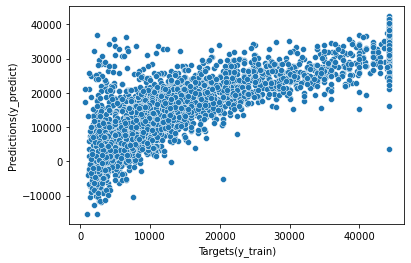

In [68]:
sns.scatterplot(Y_train,Y_predict)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


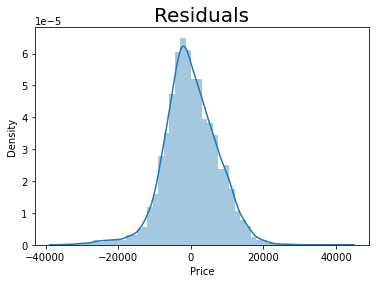

In [71]:
sns.distplot(Y_train - Y_predict)
plt.title('Residuals', size=20)
plt.show()

In [74]:
reg.score(X_train, Y_train)

0.6645315989546621

In [75]:
reg.intercept_

11470.36780393892

In [76]:
reg.coef_

array([  -75.94793732,  4771.40691965,  3373.37838662,  4810.86646627,
       -3656.57536794, -6311.63552182,    77.10328176, -1144.83941118,
        3846.83225597, -1883.62457148,  -645.95475742, -1317.25292707,
       -4592.46006266,  4592.46006266,  2851.70216629])

#### Summary of regression


In [78]:
reg_summary = pd.DataFrame(X.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-75.947937
1,EngineV,4771.406920
2,Brand_Audi,3373.378387
3,Brand_BMW,4810.866466
4,Brand_Mitsubishi,-3656.575368
5,Brand_Renault,-6311.635522
6,Brand_Toyota,77.103282
7,Brand_Volkswagen,-1144.839411
8,Engine_Type_Diesel,3846.832256
9,Engine_Type_Gas,-1883.624571


### Testing 

In [81]:
Y_predict_test = reg.predict(X_test)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


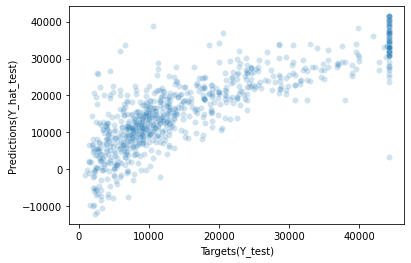

In [86]:

sns.scatterplot(Y_test, Y_predict_test, alpha=0.2)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_hat_test)')
plt.show()

In [93]:
df_pf = pd.DataFrame((Y_predict_test).round(2), columns = ['Prediction'])
df_pf.head()

,Prediction
0,12549.71
1,12620.35
2,25726.70
3,21059.02
4,5702.21


In [104]:
reg.score(X_train, Y_train)

0.6645315989546621

From test and train we get reg score our model has 66.4% 

#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [123]:
###CODEHERE
from sklearn.linear_model import Lasso

In [125]:
LS =Lasso(alpha =0.01)
LS.fit(X_train,Y_train)


C:\Users\Sarath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5902541395.875183, tolerance: 51533755.23395081
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [130]:
LS.fit(X_test,Y_test)

C:\Users\Sarath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293246328.74772644, tolerance: 13079889.405887369
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [132]:
LS.score(X_train,Y_train)

0.6566265055639762

In [134]:
LS.score(X_test,Y_test)

0.6975681803256286

#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [111]:
###CODE
from sklearn.linear_model import Ridge

In [114]:
RD = Ridge(alpha=1)
RD.fit(X_train,Y_train)


Ridge(alpha=1)

In [121]:
RD.fit(X_test,Y_test)

Ridge(alpha=1)

In [116]:
RD.score(X_train,Y_train)

0.6645307124023554

In [122]:
RD.score(X_test,Y_test)

0.6975560257351756

### Give the Conclusions about the Model fits for What you Observe.

In [ ]:
### Interpretations

From ols model and linear scikit learn model we get an accuracy of 69% which  is an average accuracy 